In [1]:
#bringing in data from vega_datasets as instructed in exercise
from vega_datasets import data
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
#Calling the sf_temps from 'data'

df = data.sf_temps()
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [3]:
#Resample by the day and take the average temperature, viz the avg temp over time

# Turn it into a dataframe, index the column, and then

# check the data type to insure it is datetime64
df.dtypes

temp           float64
date    datetime64[ns]
dtype: object

In [4]:
#turned 'date' column into index
df = df.set_index('date')
df

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


In [5]:
#resampled to get a mean temp for on daily frequency

df_daily = df.resample('D').mean()
df_daily.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


In [6]:
#resampled to get the daily mean, min, and max
df_daily = df.resample('D').agg(['mean', 'min', 'max'])
df_daily.head()

temp            
                 mean   min   max
date                             
2010-01-01  49.170833  45.8  53.3
2010-01-02  49.304167  46.0  53.4
2010-01-03  49.391667  46.1  53.5
2010-01-04  49.445833  46.1  53.6
2010-01-05  49.491667  46.1  53.8

In [7]:
df_daily = pd.DataFrame(df_daily)

In [8]:
df_daily.head()

temp            
                 mean   min   max
date                             
2010-01-01  49.170833  45.8  53.3
2010-01-02  49.304167  46.0  53.4
2010-01-03  49.391667  46.1  53.5
2010-01-04  49.445833  46.1  53.6
2010-01-05  49.491667  46.1  53.8

In [9]:
print(type(df_daily))

<class 'pandas.core.frame.DataFrame'>


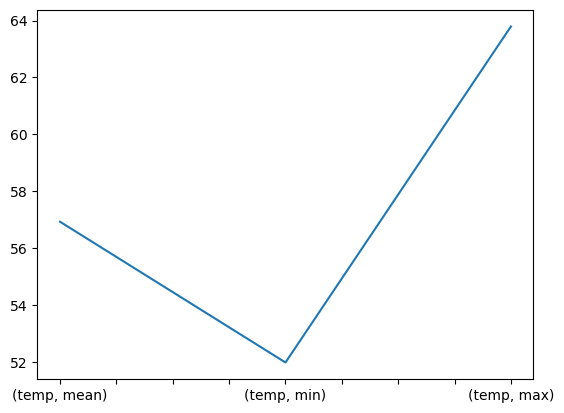

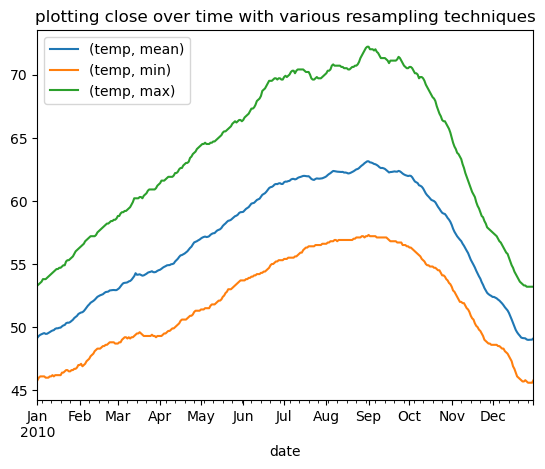

In [10]:
#to visualize now

df_daily.mean().plot(label='daily')
df_daily.resample('D').mean().plot(label='daily')
plt.title('plotting close over time with various resampling techniques')
plt.legend()
plt.show()

4. December is the coldes on average
5. September has the highest average temperature
6. July has the highest daily temperature variability

In [11]:
df_seattle = data.seattle_weather()
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [12]:
df_seattle.dtypes

date             datetime64[ns]
precipitation           float64
temp_max                float64
temp_min                float64
wind                    float64
weather                  object
dtype: object

In [13]:
#For question number 1 I will have to create columns for month and year
#

In [14]:
df_seattle['year'] = df_seattle.date.dt.year
df_seattle['month'] = df_seattle.date.dt.month

In [15]:
df_seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,1


In [23]:
max_prec_row = df_seattle.loc[df_seattle['precipitation'].idxmax()]
max_prec_row

date             2015-03-15 00:00:00
precipitation                   55.9
temp_max                        10.6
temp_min                         6.1
wind                             4.2
weather                          fog
year                            2015
month                              3
Name: 1169, dtype: object

2015 March is the year and month combination with the highest precipitation

In [32]:
df_seattle.asfreq('M').head()

,date,precipitation,temp_max,temp_min,wind,weather,year,month


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

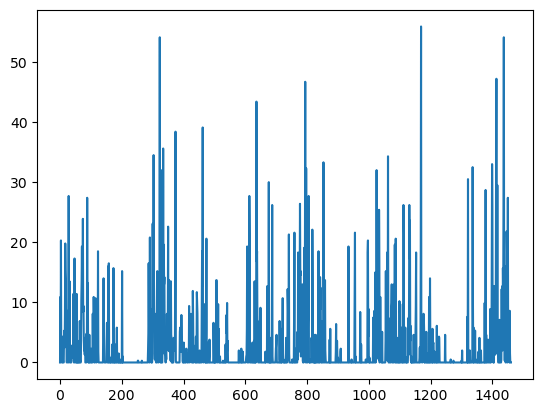

In [30]:
df_seattle.precipitation.plot(label='monthly')
df_seattle.resample("M").precipitation.plot(label='montly')
plt.title('plotting close over time with various resampling techniques')
plt.legend()
plt.show()